<center><h1><b><span style="color:blue">Fitting and model building</span></b></h1></center>

#### **Quick intro to the following packages**
- The core package `iminuit`.
- Model building and a word on the Scikit-HEP affiliated project/package `zfit`.

&nbsp;
<center>
    <img src="images/logo_iminuit.png" style="width:150px;"/>
    <h2><b><span style="color:green">Python wrapper to Minuit2 minimization and error computation package</span></b></h2>
</center>

The `iminuit` package provides Python bindings for the [C++ Minuit2 library](https://root.cern.ch/guides/minuit2-manual) maintained at CERN, which is effectively the only fitting engine used in HEP. The package has no external dependency apart from NumPy.

`iminuit` gives the user full power of the engine internals. That can be really useful, but it often demands a certain level of expertise. It is hence no wonder that many fitting libraries around build atop it. That's in particular the case for Astronomy.

Note: feel free to complement the introduction below with the several *great tutorials* available from the [GitHub repository](https://github.com/scikit-hep/iminuit). Indeed what is shown here is just an appetiser.

### **1. A very simple example**

Minimisation of a function:

In [1]:
from iminuit import Minuit

def fcn(x, y, z):
    return (x - 2) ** 2 + (y - 3) ** 2 + (z - 4) ** 2

fcn.errordef = Minuit.LEAST_SQUARES

m = Minuit(fcn, x=0, y=0, z=0)

m.migrad()  # run optimiser

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.731e-18                  │              Nfcn = 36               │
│ EDM = 6.73e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │     2     │     1     │            │            │         │         │       │
│ 1 │ y    │     3     │     1     │            │            │         │         │       │
│ 2 │ z    │     4     │     1     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │ x y z │
├───┼───────┤
│ x │ 1 0 0 │
│ y │ 0 1 0 │
│ z │ 0 0 1 │
└───┴───────┘

In [2]:
m.hesse()  # run covariance estimator

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.731e-18                  │              Nfcn = 52               │
│ EDM = 6.73e-18 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │     2     │     1     │            │            │         │         │       │
│ 1 │ y    │     3     │     1     │            │            │         │         │       │
│ 2 │ z    │     4     │     1     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │ x y z │
├───┼───────┤
│ x │ 1 0 0 │
│ y │ 0 1 0 │
│ z │ 0 0 1 │
└───┴───────┘

### **2. A more evolved example**

Let's look at a little sample of track information generated with a toy.

<div class="alert alert-info">

<b>Acknowledgements</b>

This mini-tutorial is kindly provided by Hans Dembinski (TU Dortmund), with minor modifications.
</div>

In [3]:
import uproot

f = uproot.open("data/sample_tracks.root")

event = f["event"]

In [4]:
event.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
trk_len              | int32_t                  | AsDtype('>i4')
mc_trk_len           | int32_t                  | AsDtype('>i4')
trk_imc              | int32_t[]                | AsJagged(AsDtype('>i4'))
trk_px               | float[]                  | AsJagged(AsDtype('>f4'))
trk_py               | float[]                  | AsJagged(AsDtype('>f4'))
trk_pz               | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_px            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_py            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pz            | float[]                  | AsJagged(AsDtype('>f4'))
mc_trk_pid           | int32_t[]                | AsJagged(AsDtype('>i4'))


Legend :-):
* mc_trk_len: number of true tracks in event
* mc_trk_px: x-component of true momentum of particle (variable-length array)
* mc_trk_py: y-component of true momentum of particle (variable-length array)
* mc_trk_pz: z-component of true momentum of particle (variable-length array)
* trk_len: number of reconstructed tracks in event
* trk_px: x-component of momentum of reconstructed track (variable-length array)
* trk_py: y-component of momentum of reconstructed track (variable-length array)
* trk_pz: z-component of momentum of reconstructed track (variable-length array)
* trk_imc: index of matched true particle or -1 (variable-length array)

Get the content of branches as arrays (don't use this in large trees - you will exhaust the computer memory):

In [5]:
trk_len = event["trk_len"].array()
mc_trk_len = event["mc_trk_len"].array()
#trk_mom = event.arrays(["trk_px", "trk_py", "trk_pz"], library="pd")
trk_px = event["trk_px"].array(library="pd")

In [6]:
# first ten entries, this is a normal numpy array
trk_len[:10]

<Array [7, 6, 3, 6, 4, 7, 4, 5, 4, 3] type='10 * int32'>

In [7]:
import numpy as np

print(f"{np.sum(trk_len == 0)} events with zero tracks")

63 events with zero tracks


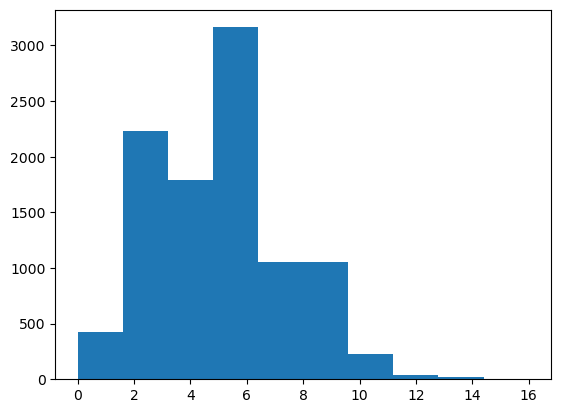

In [8]:
import matplotlib.pyplot as plt

plt.hist(trk_len);

In [9]:
# first ten entries, trk_px is a special jagged array
trk_px[:10]

0    [-0.6920520067214966, 0.47761717438697815, -0....
1    [0.07138693332672119, -0.12577307224273682, 0....
2    [0.15179944038391113, 0.18735994398593903, -0....
3    [-0.09476272761821747, -0.23816564679145813, 1...
4    [0.3027496337890625, 1.2473642826080322, -0.87...
5    [0.6755227446556091, -0.45894306898117065, 0.5...
6    [0.5256932973861694, -0.9807479381561279, -0.3...
7    [-0.5512446165084839, -0.1379464566707611, -0....
8    [0.793757438659668, -0.24584700167179108, -0.2...
9    [0.30341583490371704, 0.17404547333717346, -0....
dtype: awkward

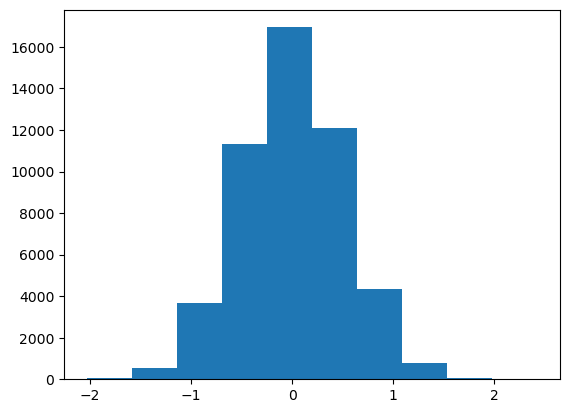

In [10]:
import awkward as ak
plt.hist(ak.flatten(trk_px));

#### **Fits**

* Typical analysis work flow:
    1. Pre-select data and make compact data trees
    2. Make histograms and profiles from tree data
    3. Fit histograms and profiles to extract physical parameters
* Many specialized fitting tools for individual purposes, e.g.:
    - [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)
    - [RooFit](https://root.cern.ch/roofit)
* Generic method
    - Select mathematical model (PDF) which describes data
    - Use maximum-likelihood method to adapt model to data
* Specialised methods give fast results for some types of problems
* Generic method allows one to do advanced things not implemented in specialised methods

Let's fit the $p_x$ distribution with a normal distribution to extract the parameters $\mu$ and $\sigma$.

- To apply a maximum-likelihood method, we need a statistical model that describes the data
- Assumption 1: original data before histogramming is normal distributed; pdf is $\mathcal{N}(\mu, \sigma)$ with parameters $\mu$ and $\sigma$
- Assumption 2: count in histogram cell is Poisson distributed $P(n_i, \lambda_i)$
- Expected content in a histogram cell is $\lambda_i = N \int_{x_i}^{x_{i+1}} \mathcal{N}(\mu, \sigma) \, \text{d}x$, where $N$ is total number of events
- Likelihood is joint probability of data under model
  $L = \prod_i P(n_i, \lambda_i)$, need to maximize this by varying model parameters $\mu$ and $\sigma$
- Technical step to achieve this: Minimize score $S(\mu,\sigma) = -2\ln L(\mu, \sigma) = -2\sum_i \ln P(n_i; \lambda_i)$

In [11]:
trk_px

0       [-0.6920520067214966, 0.47761717438697815, -0....
1       [0.07138693332672119, -0.12577307224273682, 0....
2       [0.15179944038391113, 0.18735994398593903, -0....
3       [-0.09476272761821747, -0.23816564679145813, 1...
4       [0.3027496337890625, 1.2473642826080322, -0.87...
                              ...                        
9995    [0.6323919892311096, -0.4815252721309662, 0.30...
9996    [-0.26708662509918213, -0.24033644795417786, 0...
9997    [-0.3860778510570526, 0.5450289845466614, 0.19...
9998           [0.5447519421577454, -0.19548873603343964]
9999    [0.2291567623615265, 0.224922314286232, -0.214...
Length: 10000, dtype: awkward

In [12]:
import boost_histogram as bh

xaxis = bh.axis.Regular(50, -2, 2)
h_px = bh.Histogram(xaxis)

h_px.fill(ak.flatten(trk_px))

Histogram(Regular(50, -2, 2), storage=Double()) # Sum: 49792.0 (49797.0 with flow)

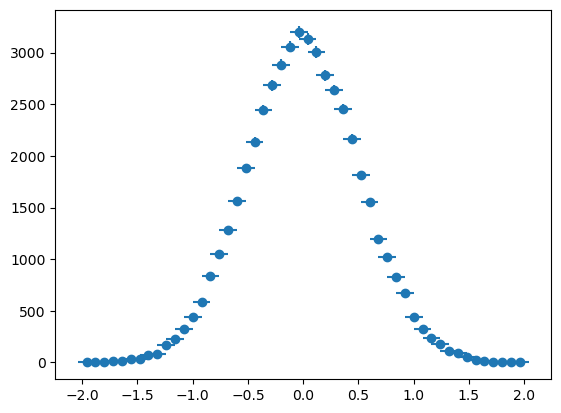

In [13]:
# get data from before
px_axis = h_px.axes[0]
cx = px_axis.centers
dx = px_axis.widths
xe = px_axis.edges
n = h_px.view()

plt.errorbar(cx, n, n**0.5, dx, fmt="o", label="data");

In [14]:
# scipy has efficient and correct implementations for most statistical distributions
from scipy.stats import norm, poisson

n_total = np.sum(n)

def score(mu, sigma):
    cdf = norm(mu, sigma).cdf
    lambdas = n_total * (cdf(xe[1:]) - cdf(xe[:-1]))
    probs = poisson.pmf(n, lambdas)
    return -2 * np.sum(np.log(probs + 1e-100)) # avoid taking log of zero

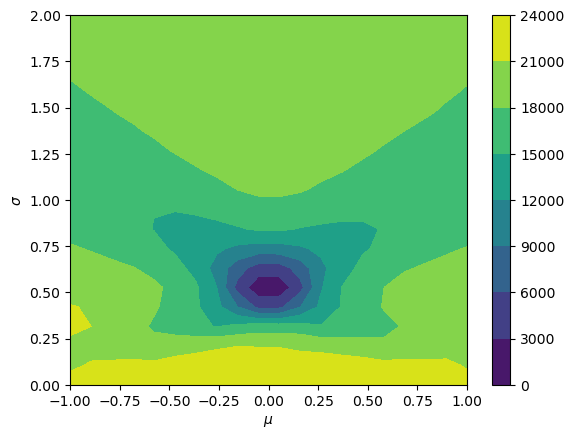

In [15]:
from matplotlib.ticker import LogLocator

mus = np.linspace(-1, 1, 20)
sigmas = np.linspace(1e-10, 2, 20)

g_mu, g_sigma = np.meshgrid(mus, sigmas)
g_score = np.vectorize(score)(g_mu, g_sigma)

plt.contourf(g_mu, g_sigma, g_score)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
plt.colorbar();

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\q'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\q'
<>:10: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_17752\920814338.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"$\mu = {mu:.3f} \pm {s_mu:.3f}, \quad \sigma = {sigma:.3f} \pm {s_sigma:.3f}$")
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_17752\920814338.py:10: SyntaxWarning: invalid escape sequence '\p'
  plt.title(f"$\mu = {mu:.3f} \pm {s_mu:.3f}, \quad \sigma = {sigma:.3f} \pm {s_sigma:.3f}$")
C:\Users\Eduardo Rodrigues\AppData\Local\Temp\ipykernel_17752\920814338.py:10: SyntaxWarning: invalid escape sequence '\q'
  plt.title(f"$\mu = {mu:.3f} \pm {

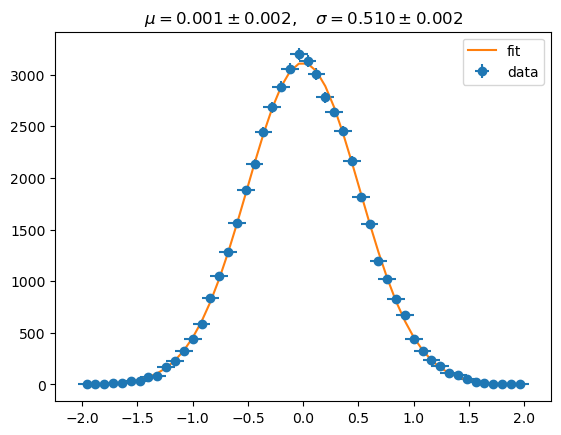

In [16]:
m = Minuit(score, mu=0, sigma=1)
m.errordef = Minuit.LEAST_SQUARES
m.migrad()

mu, sigma = m.values
s_mu, s_sigma = m.errors

plt.errorbar(cx, n, n ** 0.5, dx, fmt="o", label="data");
plt.plot(cx, norm(mu, sigma).pdf(cx) * n_total * dx, label="fit")
plt.title(f"$\mu = {mu:.3f} \pm {s_mu:.3f}, \quad \sigma = {sigma:.3f} \pm {s_sigma:.3f}$")
plt.legend();

Check whether the fit is good:
- by looking at *pull distribution*
    - $(n_i - \lambda_i) / \lambda_i$ for Poisson distribute data
- by checking the $\chi^2$ value against the degrees of freedom
    - Simple check: $\chi^2/n_\text{dof}$ should be about 1
    - Better check: chance probability $\int_{\chi^2_\text{observed}}^{-\infty} P(\chi^2; n_\text{dof}) \, \text{d}\chi^2$ to obtain a higher value than the observed should not be too small

chi2/ndof = 56.45016984961358 / 48 = 1.176045205200283
0.18844721801206454


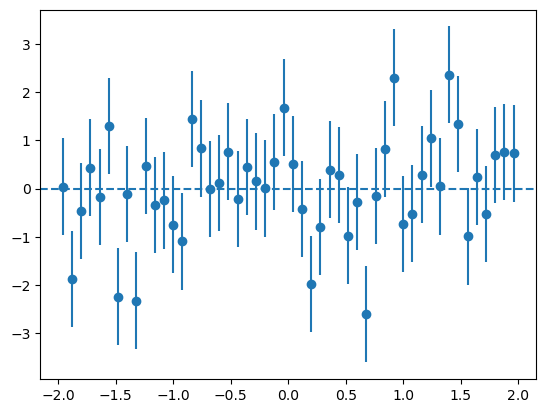

In [17]:
cdf = norm(mu, sigma).cdf

n_pred = (cdf(xe[1:]) - cdf(xe[:-1])) * n_total
n_sigma = n_pred ** 0.5 # for Poisson-distributed data

pull = (n - n_pred) / n_sigma

plt.errorbar(cx, pull, np.ones_like(pull), fmt="o")
plt.axhline(0, ls="--")

# degrees of freedom: number of fitted bins minus number of fitted parameters
n_dof = len(n) - 2 # need to subtract two fitted parameters

chi2_obs = np.sum(pull ** 2)

print(f"chi2/ndof = {chi2_obs} / {n_dof} = {chi2_obs / n_dof}")

from scipy.stats import chi2

chance_prob = 1 - chi2(n_dof).cdf(chi2_obs)

print(f"{chance_prob}")

### **3. Towards realistic HEP data use-cases**

HEP analyses typically involve far more sophisticated fitting work. It is often about **data model building** and performing **(un)binned maximum likelihood fits** to describe experimental distributions. Also, fitting is often performed to extract decay mode yields atop the model parameters.

The `iminuit` package has functionality to performed so-called *simultaneous fits*,
where the models being fitted to two or more datasets share at least a parameter.
But it is not meant as a package providing commonly-used goodies and a "framework" for (complex) model building. Imagine how cumbersome it would be to verbosely describe the model below for an amplitude analysis ...!

#### **A simple binned extended maximum-likelihood fit example**

(Taken straight from one of the excellent `iminuit` tutorials.)

The binned extended maximum-likelihood fit is strictly the binned equivalent of the corresponding unbinned fit. One sums the logarithm of Poisson probabilities for the observed counts as a function of the predicted counts in this case (times -1 to turn maximization into minimization).

Instead of a density, you need to provide a cdf of the density in this case (which must be vectorized). There is no need to separately return the total integral like the unbinned case. The parameters are the same as in the unbinned extended fit.

In [18]:
from iminuit import cost
from scipy.stats import norm, uniform

xrange = -1, 1

rng = np.random.default_rng(1)

xdata = rng.normal(0, 0.1, size=400)
xdata = np.append(xdata, rng.uniform(*xrange, size=1000))

def model_pdf(x, z, mu, sigma):
    return (z * norm.pdf(x, mu, sigma) + 
            (1 - z) * uniform.pdf(x, xrange[0], xrange[1] - xrange[0]))

c = cost.UnbinnedNLL(xdata, model_pdf)

m = Minuit(c, z=0.4, mu=0, sigma=0.2)
m.limits["sigma"] = (0, None)
m.limits["z"] = (0, 1)
m.limits["mu"] = (-1, 1)

m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1504                       │              Nfcn = 83               │
│ EDM = 3.42e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ z     │   0.275   │   0.017   │            │            │    0    │    1    │       │
│ 1 │ mu    │  -0.009   │   0.006   │            │            │   -1    │    1    │       │
│ 2 │ sigma │   0.084   │   0.006   │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │         z        mu     sigma │
├───────┼───────────────────────────────┤
│     z │  0.000298        -0  0.037e-3 │
│    mu │        -0  3.79e-05 -0.002e-3 │
│ sigma │  0.037e-3 -0.002e-3  3.22e-05 │
└───────┴───────────────────────────────┘

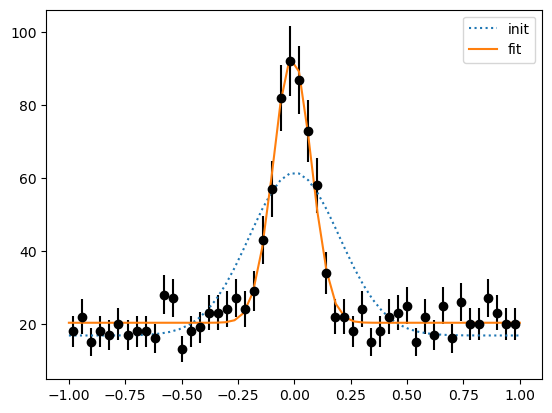

In [19]:
n, xe = np.histogram(xdata, bins=50, range=xrange)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
xm = np.linspace(xe[0], xe[-1])
plt.plot(xm, model_pdf(xm, *[p.value for p in m.init_params]) * len(xdata) * dx[0],
         ls=":", label="init")
plt.plot(xm, model_pdf(xm, *m.values) * len(xdata) * dx[0], label="fit")
plt.legend();

#### **Scaling up in complexity**

In spite of the example above being a *simple* example of an extended maximum-likelihood fit to binned data, the code is, honestly, very verbose.
Clearly much of the above could be simplified for the general user. And now imagine that the (realistic example!) function to fit is not a uniform+normal distribution but rather this:

<center><img src="images/fitting_AmAn-example.png" width="55%"/></center>
[Example taken from a presentation by Anton Poluektov.]

The ROOT framework provides `RooFit` as a model fitting library. The PyHEP ecosystem in particular has the `zfit` package, a model fitting library based on TensorFlow and optimised for simple and direct manipulation of probability density functions ...